In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('works.csv')

In [44]:
#1
rows_count = df.shape[0]
print("Всего записей:", rows_count)

Всего записей: 32683


In [45]:
def get_rows_with_gender(df: pd.DataFrame, gender: str) -> pd.DataFrame:
    return df[df["gender"] == gender]

females = get_rows_with_gender(df, "Женский")
males = get_rows_with_gender(df, "Мужской")

In [46]:
#2
print("Всего женщин:", females.shape[0])
print("Всего мужчин:", males.shape[0])

Всего женщин: 17910
Всего мужчин: 13386


In [47]:
#3
no_none_skills_count = df["skills"].count()

print("Значений в столбце skills не NAN:", no_none_skills_count)

Значений в столбце skills не NAN: 8972


In [48]:
#4
skills = df[df["skills"].notna()]
print("Все заполненные скиллы:\n", skills["skills"])

Все заполненные скиллы:
 0        <p>Аналитическое&nbsp;мышление,&nbsp;<span cla...
5        Ответственная,пунктуальная,дисциплинированная ...
10                         <p>Коммуникабельность&nbsp;</p>
13                         <p>Ответственность в работе</p>
21       <p>Усидчивость, умение удерживать в памяти нуж...
                               ...                        
32665    <p>Отвественность</p><p>Исполнительность</p><p...
32668    <p>Высокая работоспособность, нацеленность на ...
32672                                <p>исполнительный</p>
32674    <p>Нацелен на результат. Считаю себя командным...
32675                                 <p>трудоспособен</p>
Name: skills, Length: 8972, dtype: object


In [49]:
#5
python_skills = df["skills"].dropna().str.contains('Python|Питон|python|питон')
print("Python skills:")
print(skills[python_skills]["salary"])

Python skills:
230      35000
334      20000
2394     35000
8096     15000
9014     25000
9667     90000
20930    30000
22530    50000
28286    23000
30430    23000
Name: salary, dtype: int64


In [50]:
#6
pr = [i / 10 for i in range(1, 11)]
print("Женщины:\n", females["salary"].quantile(pr))
print("Мужчины\n", males["salary"].quantile(pr))

Женщины:
 0.1     15000.0
0.2     18000.0
0.3     20000.0
0.4     22000.0
0.5     25000.0
0.6     30000.0
0.7     30000.0
0.8     35000.0
0.9     47000.0
1.0    900000.0
Name: salary, dtype: float64
Мужчины
 0.1      15000.0
0.2      20000.0
0.3      25000.0
0.4      30000.0
0.5      30000.0
0.6      35000.0
0.7      40000.0
0.8      50000.0
0.9      60000.0
1.0    1000000.0
Name: salary, dtype: float64


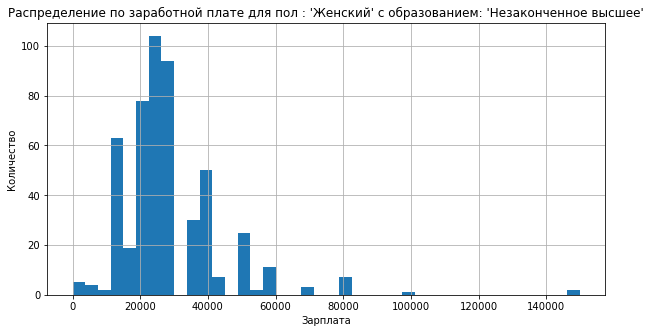

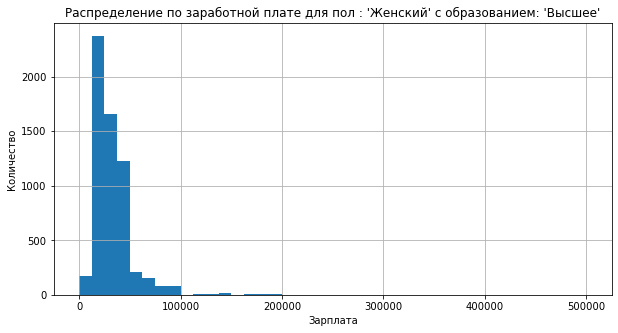

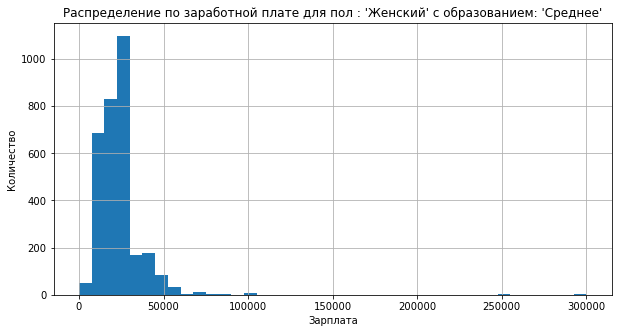

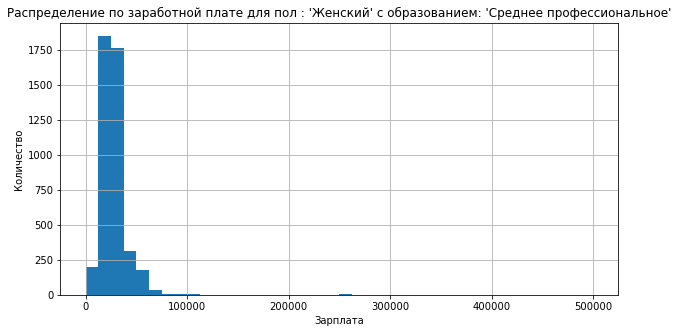

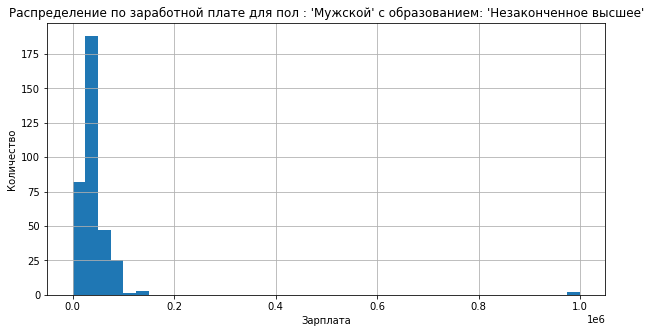

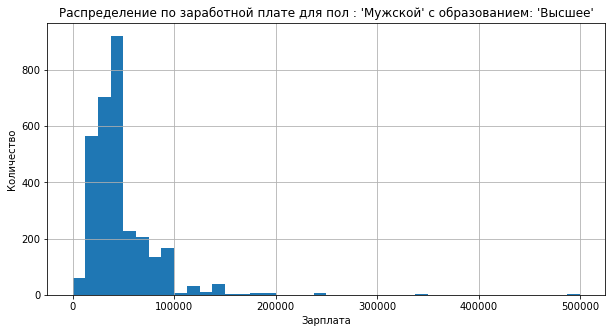

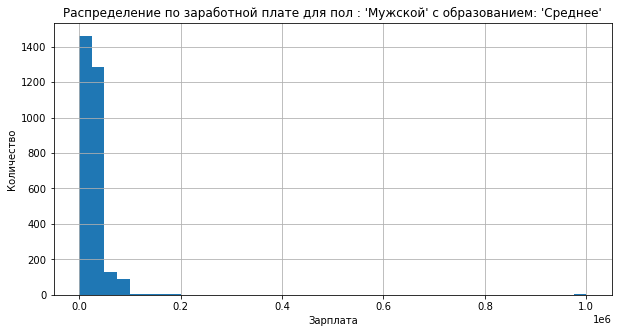

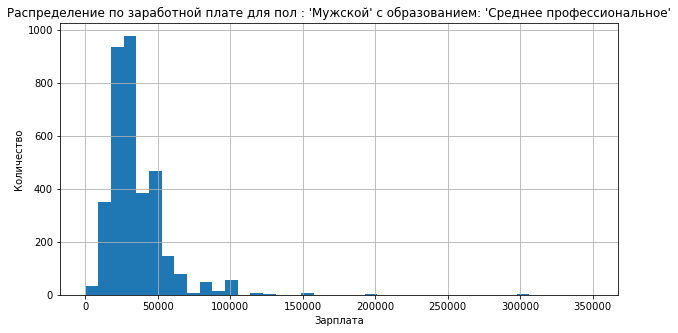

In [51]:
#7
genders = set(df.dropna()["gender"])
educations = set(df.dropna()["educationType"])

for gender in genders:
    for education in educations:
        plt.figure(figsize=(10, 5))  
        plt.grid()
        plt.title(f"Распределение по заработной плате для пол : '{gender}' с образованием: '{education}'") 
        plt.xlabel("Зарплата") 
        plt.ylabel("Количество") 
        query = f'gender == "{gender}" and educationType == "{education}"'
        plt.hist(df.query(query)["salary"], bins=40)

In [85]:
#8
task_8_data = df.dropna(subset=["jobTitle", "qualification"])

In [86]:
#Профессия и должность не совпрадают без рассмотрения случая множества слов
jobs = task_8_data.jobTitle.str.lower()
qualifications = task_8_data.qualification.str.lower()
print(f"У {sum(jobs != qualification)} человек должность и профессия не совпадают.")

У 10076 человек должность и профессия не совпадают.


In [87]:
#Профессия и должность не совпрадают с рассмотрением случая множества слов
import re

count = 0

for job_title, qualification in zip(jobs, qualifications):
    job_title_words = set(re.split(",|-| |\t", job_title.lower().strip()))
    qualification_words = set(re.split(",|-| |\t", qualification.lower().strip()))
    if len(job_title_words & qualification_words) == 0:
        count += 1
        
print(f"Примерно проессия и должность не совпадают у {count} человек(а)")

Примерно проессия и должность не совпадают у 8720 человек(а)


бакалавр     98
экономист    86
менеджер     79
юрист        41
инженер      37
Name: qualification, dtype: int64


<AxesSubplot:title={'center':'Топ-5 образований у менеджеров'}, ylabel='Количество представителей'>

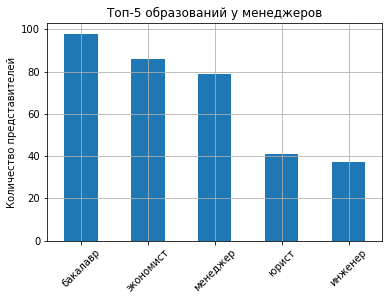

In [115]:
#Топ-5 образований у менеджеров
title = "Топ-5 образований у менеджеров"
manager_educations = task_8_data[task_8_data["jobTitle"].str.lower().str.contains("менедж|manager")]
top_5_manager_educations = manager_educations["qualification"].str.lower().value_counts().head(5)
print(top_5_manager_educations)
top_5_manager_educations.plot(kind="bar", title=title, grid=True, rot=45, ylabel="Количество представителей")

инженер            25
главный инженер    23
директор           21
менеджер           13
водитель           11
Name: jobTitle, dtype: int64


<AxesSubplot:title={'center':'Топ-5 образований у менеджеров'}, ylabel='Количество представителей'>

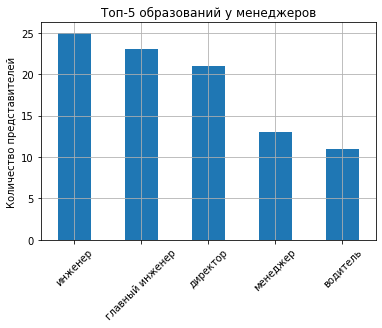

In [116]:
# Топ-5 профессий у тех, кто имееет образование инженера 
engineers_qual = task_8_data[task_8_data["qualification"].str.lower().str.contains("инжене|engineer")]
top_5_engineers_educations = engineers_qual["jobTitle"].str.lower().value_counts().head(5)
print(top_5_engineers_educations)
top_5_engineers_educations.plot(kind="bar", title=title, grid=True, rot=45, ylabel="Количество представителей")